# 필요한 라이브러리 임포트

In [1]:
import torch
import pandas as pd

# 전처리 함수 정의

In [2]:
# 문자 종류 확인
def build_vocab_from_df(df: pd.DataFrame):
    char_vocab = set()
    for line in df["msg"]:
        for c in line:
            char_vocab.add(c)
    return char_vocab

# 데이터 확인

In [3]:
df = pd.read_csv("data/SMSSpamCollection", sep="\t", names=["label", "msg"])
df

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 전처리

In [4]:
# 중복 데이터 제거
df.drop_duplicates(subset="msg", inplace=True)

# 결측치 제거
df.isna().any()

label    False
msg      False
dtype: bool

ham     4516
spam     653
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

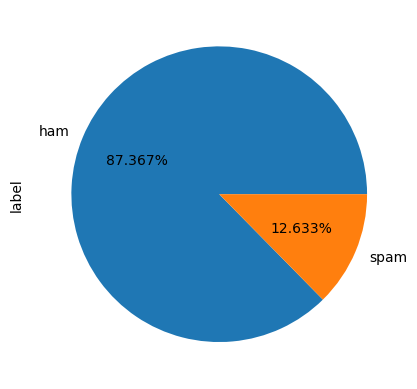

In [10]:
# 라벨 분포 확인
print(df["label"].value_counts())
df["label"].value_counts().plot(kind="pie", autopct="%.3f%%")

In [11]:
char_vocab = build_vocab_from_df(df)
print(char_vocab)

{'^', '!', 'q', 'R', '(', '.', 'w', 't', '鈥', 'è', '|', 'É', '┾', '4', '‘', 'é', '’', '—', 'n', 'm', 'g', '<', 'C', '6', 'W', '/', 'B', '0', "'", 'S', 'H', '~', '3', '+', ',', '\x91', 'r', 'O', '1', '>', 'ì', '[', 'I', 'b', '=', '8', 'p', 'T', 'Z', ']', 'F', 'k', 'Ü', 'G', ')', 'J', 'e', '&', '»', 'ú', 'E', 'f', '\n', 'x', '#', 'Y', '–', '2', 'v', 'u', '\x92', '@', ' ', '5', 'N', '\x94', 'P', 'V', '"', 'ü', '£', '-', '%', 'j', 'z', 'K', 's', 'd', 'X', 'o', 'U', '?', 'l', 'c', '…', '7', '“', 'L', '_', '¡', 'Q', '\x96', '\x93', '〨', 'h', 'M', ';', ':', '\\', 'a', '*', 'i', '\t', 'y', 'D', 'A', '9', '$'}


## \x91 ~ \x96 확인
\x92가 포함된 메시지를 보면 '가 들어가는 것이 적절해 보인다.
그 외 문자들은 삭제 처리해도 무방해 보인다.

In [168]:
df.loc[df["msg"].str.contains("\x91")]

,label,msg
1724,ham,"Hi Jon, Pete here, Ive bin 2 Spain recently & hav sum dinero left, Bill said u or ur rents mayb interested in it, I hav 12,000pes, so around £48, tb, James."
3547,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW R U MAN? ALL IS GOOD IN WALES ILL B BACK MORROW. C U THIS WK? WHO WAS THE MSG 4?  RANDOM!


In [169]:
df.loc[df["msg"].str.contains("\x92")].head()

,label,msg
18,ham,Fine if thats the way u feel. Thats the way its gota b
457,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN AND I LIKE U A LOT. I KNOW U DONT LIKE ME LIKE THAT SO DONT WORRY."
793,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE JAN C THATS AL!!!!!!!!!
820,ham,BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GETTIN ON WELL HUNNY!HOPE URE OK?TAKE CARE & ILLSPEAK 2U SOONLOTS OF LOVEME XXXX.
832,ham,Hi mate its RV did u hav a nice hol just a message 3 say hello coz havent sent u 1 in ages started driving so stay off roads!RVx


In [170]:
df.loc[df["msg"].str.contains("\x93")]

,label,msg
2821,spam,INTERFLORA - It's not too late to order Interflora flowers for christmas call 0800 505060 to place your order before Midnight tomorrow.
3860,spam,"Win the newest Harry Potter and the Order of the Phoenix (Book 5) reply HARRY, answer 5 questions - chance to be the first among readers!"


In [171]:
df.loc[df["msg"].str.contains("\x94")]

,label,msg
1266,ham,"Im in inperialmusic listening2the weirdest track ever byleafcutter john-sounds like insects being molested&someone plumbing,remixed by evil men on acid!"
2236,ham,"Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtbraindancea comp.ofstuff on aphexs ;abel,u hav2hear it!c u sn xxxx"


In [172]:
df.loc[df["msg"].str.contains("\x96")]

,label,msg
3547,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW R U MAN? ALL IS GOOD IN WALES ILL B BACK MORROW. C U THIS WK? WHO WAS THE MSG 4?  RANDOM!
4551,ham,Hey! do u fancy meetin me at 4 at cha  hav a lil beverage on me. if not txt or ring me and we can meet up l8r. quite tired got in at 3 v.pist ;) love Pete x x x
5081,ham,"Keep ur problems in ur heart, b'coz nobody will fight for u. Only u &amp; u have to fight for ur self &amp; win the battle. -VIVEKANAND- G 9t.. SD..\nham\tYeah, give me a call if you've got a minute\nham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACKS  FUCKINNICE!SELFISH,DEVIOUSBITCH.ANYWAY,IL CALL U"""


## 특수문자 확인
'┾', '〨', '鈥'는 없애도 될 것 같다.

In [173]:
df.loc[df["msg"].str.contains("┾|〨|鈥")]

,label,msg
5400,ham,HARD BUT TRUE: How much you show &amp; express your love to someone....that much it will hurt when they leave you or you get seperated...!鈥┾??〨ud evening...


## 문자 변경
문자를 삭제, 변경해준다.

In [23]:
char_convert_map = {
    "\t": " ",
    "\n": " ",
    "¡": "i",
    "»": ">>",
    "É": "E",
    "Ü": "U",
    "è": "e",
    "é": "e",
    "ì": "i",
    "ú": "u",
    "ü": "u",
    '–': '-',
    '—': '-',
    "‘": "'",
    "’": "'",
    "“": '"',
    "&lt;": "<",
    "&gt;": ">",
    "&amp;": "&",
    "┾": "",
    "〨": "",
    "鈥": "",
    "\x91": "",
    "\x92": "'",
    "\x93": "",
    "\x94": "",
    "\x96": "",
}

In [25]:
df['msg_convert'] = df['msg']
for old, new in char_convert_map.items():
    df["msg_convert"] = df["msg_convert"].str.replace(old, new)

# 전처리 확인
df.loc[df["msg_convert"].str.contains("|".join(char_convert_map.keys()))]

,label,msg,msg_convert


## 라벨을 숫자로 변경

In [176]:
df['label'] = df['label'].map({"ham":0, "spam":1})
df

,label,msg,msg_convert
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","Nah I don't think he goes to usf, he lives around here though"
...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,0,Will ü b going to esplanade fr home?,Will u b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?","Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


## 데이터셋 저장

In [26]:
save_df = df.drop(columns='msg')
save_df.rename(columns={'msg_convert': 'msg'}, inplace=True)
save_df.to_csv("data/SMSSpamCollection_preprocessed", index=False)

In [27]:
df = pd.read_csv("data/SMSSpamCollection_preprocessed")
assert df['msg'].str.contains("|".join(char_convert_map.keys())).any() == False

# EDA

## 총 문자 종류 갯수

In [8]:
new_char_vocab = build_vocab_from_df(df)
print("문자 종류 갯수:", len(new_char_vocab))

문자 종류 갯수: 98


## 메세지 길이의 분포 확인

<AxesSubplot:ylabel='Frequency'>

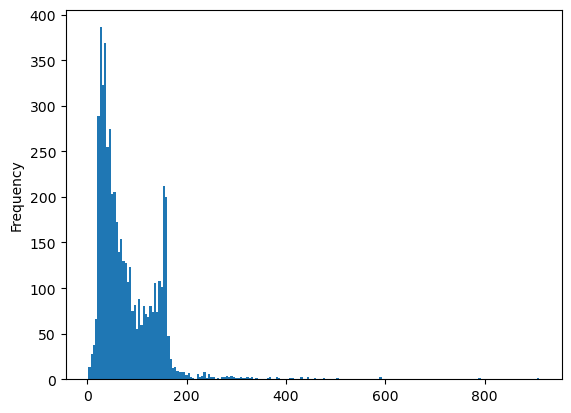

In [194]:
df['len'] = df['msg'].str.len()
df['len'].plot.hist(bins=200)

# 데이터셋 분리

훈련 0.7, 검증 0.15, 테스트 0.15의 비율로 나눈다.

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
val, test = train_test_split(test, test_size=0.5, stratify=test['label'])
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())

train.to_csv("data/train.csv", index=False)
val.to_csv("data/val.csv", index=False)
test.to_csv("data/test.csv", index=False)

0    3161
1     457
Name: label, dtype: int64
0    677
1     98
Name: label, dtype: int64
0    678
1     98
Name: label, dtype: int64
